In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dschettler8845/brats-2021-task2")

print("Path to dataset files:", path)

Path to dataset files: D:\Users\juanp_schamun\.cache\kagglehub\datasets\dschettler8845\brats-2021-task1\versions\1


In [2]:
# Instalar nibabel si no está instalado
# !pip install nibabel

import nibabel as nib
import matplotlib.pyplot as plt
import os


Archivos en D:/Users/juanp_schamun/.cache/kagglehub/datasets/dschettler8845/brats-2021-task1/versions/1/BraTS2021_Training_Data\BraTS2021_01468: ['BraTS2021_01468_flair.nii.gz', 'BraTS2021_01468_seg.nii.gz', 'BraTS2021_01468_t1.nii.gz', 'BraTS2021_01468_t1ce.nii.gz', 'BraTS2021_01468_t2.nii.gz']


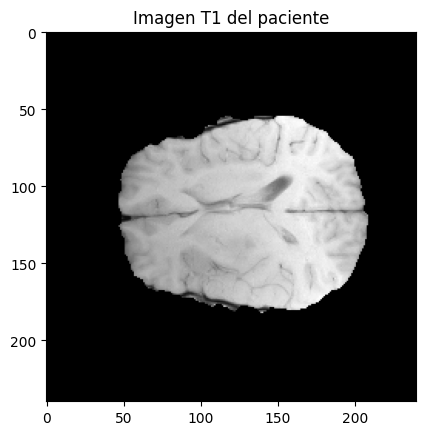

In [ ]:
# Directorio de las imágenes NIfTI
dataset_path = 'D:/Users/juanp_schamun/.cache/kagglehub/datasets/dschettler8845/brats-2021-task1/versions/1/BraTS2021_Training_Data'

# Lista los archivos del primer directorio
patient_dir = os.path.join(dataset_path, 'BraTS2021_01468')  # Cambiar según el paciente
files = os.listdir(patient_dir)
print(f"Archivos en {patient_dir}: {files}")

# Cargar una imagen de la modalidad T1 para ver un ejemplo
nifti_file = os.path.join(patient_dir, 'BraTS2021_01468_t1.nii.gz')
img = nib.load(nifti_file)

# Obtener los datos de la imagen
img_data = img.get_fdata()

# Mostrar una sección de la imagen
plt.imshow(img_data[:, :, img_data.shape[2] // 2], cmap='gray')
plt.title('Imagen T1 del paciente')
plt.show()

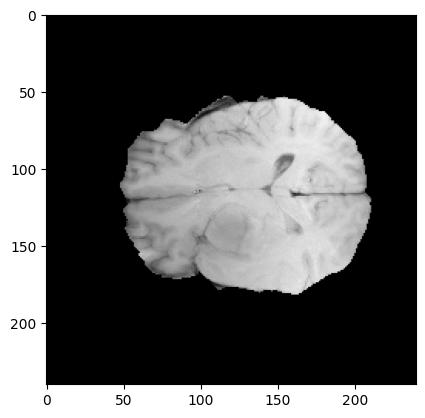

In [19]:
plt.imshow(img_data[:, :, 70], cmap='gray')

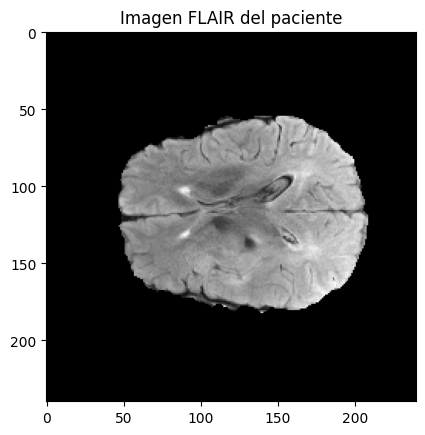

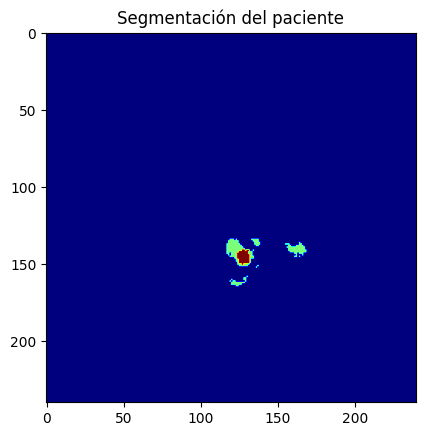

In [4]:
# Cargar la modalidad FLAIR
flair_file = os.path.join(patient_dir, 'BraTS2021_01468_flair.nii.gz')
flair_img = nib.load(flair_file)
flair_data = flair_img.get_fdata()

# Mostrar la imagen FLAIR
plt.imshow(flair_data[:, :, flair_data.shape[2] // 2], cmap='gray')
plt.title('Imagen FLAIR del paciente')
plt.show()

# Cargar la segmentación
seg_file = os.path.join(patient_dir, 'BraTS2021_01468_seg.nii.gz')
seg_img = nib.load(seg_file)
seg_data = seg_img.get_fdata()

# Mostrar la segmentación
plt.imshow(seg_data[:, :, seg_data.shape[2] // 2], cmap='jet')
plt.title('Segmentación del paciente')
plt.show()

In [5]:
# Listar todos los archivos en la carpeta
for patient_dir in os.listdir(dataset_path):
    patient_path = os.path.join(dataset_path, patient_dir)
    if os.path.isdir(patient_path):
        print(f"Paciente: {patient_dir}")
        print(f"Archivos: {os.listdir(patient_path)}")


Paciente: BraTS2021_00000
Archivos: ['BraTS2021_00000_flair.nii.gz', 'BraTS2021_00000_seg.nii.gz', 'BraTS2021_00000_t1.nii.gz', 'BraTS2021_00000_t1ce.nii.gz', 'BraTS2021_00000_t2.nii.gz']
Paciente: BraTS2021_00002
Archivos: ['BraTS2021_00002_flair.nii.gz', 'BraTS2021_00002_seg.nii.gz', 'BraTS2021_00002_t1.nii.gz', 'BraTS2021_00002_t1ce.nii.gz', 'BraTS2021_00002_t2.nii.gz']
Paciente: BraTS2021_00003
Archivos: ['BraTS2021_00003_flair.nii.gz', 'BraTS2021_00003_seg.nii.gz', 'BraTS2021_00003_t1.nii.gz', 'BraTS2021_00003_t1ce.nii.gz', 'BraTS2021_00003_t2.nii.gz']
Paciente: BraTS2021_00005
Archivos: ['BraTS2021_00005_flair.nii.gz', 'BraTS2021_00005_seg.nii.gz', 'BraTS2021_00005_t1.nii.gz', 'BraTS2021_00005_t1ce.nii.gz', 'BraTS2021_00005_t2.nii.gz']
Paciente: BraTS2021_00006
Archivos: ['BraTS2021_00006_flair.nii.gz', 'BraTS2021_00006_seg.nii.gz', 'BraTS2021_00006_t1.nii.gz', 'BraTS2021_00006_t1ce.nii.gz', 'BraTS2021_00006_t2.nii.gz']
Paciente: BraTS2021_00008
Archivos: ['BraTS2021_00008_flair.

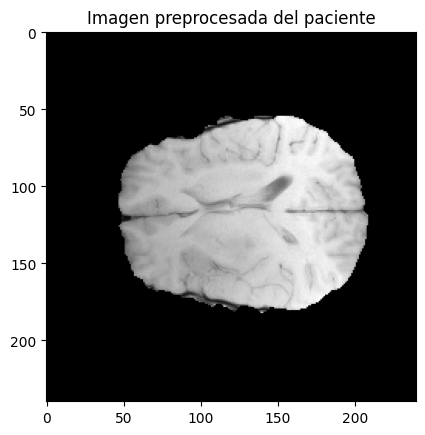

In [6]:
import numpy as np

# Normalizar las imágenes (por ejemplo, entre 0 y 1)
img_data_normalized = img_data / np.max(img_data)

# Asegurarse de que la imagen tiene el tamaño esperado
img_resized = img_data_normalized[:, :, img_data.shape[2] // 2]  # Usar una sección del volumen

# Mostrar la imagen preprocesada
plt.imshow(img_resized, cmap='gray')
plt.title('Imagen preprocesada del paciente')
plt.show()

In [7]:
import torch
import torchvision
from transformers import AutoFeatureExtractor, AutoModelForImageClassification
from torch.utils.data import DataLoader, Dataset
import nibabel as nib
import numpy as np
import os
from torchvision import transforms
import matplotlib.pyplot as plt

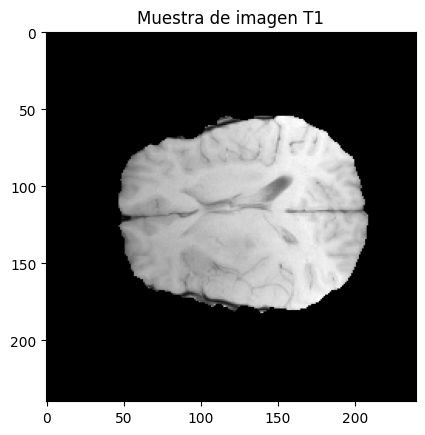

In [8]:
dataset_path = 'D:/Users/juanp_schamun/.cache/kagglehub/datasets/dschettler8845/brats-2021-task1/versions/1/BraTS2021_Training_Data'

# Función para cargar las imágenes
def load_image(image_path):
    img = nib.load(image_path)
    return img.get_fdata()

# Ver una muestra de las imágenes
sample_image_path = os.path.join(dataset_path, "BraTS2021_01468", "BraTS2021_01468_t1.nii.gz")
image_data = load_image(sample_image_path)

# Mostrar una corte de la imagen
plt.imshow(image_data[:, :, image_data.shape[2] // 2], cmap="gray")
plt.title("Muestra de imagen T1")
plt.show()


In [20]:
class BrainTumorDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.masks = []

        # Obtener todos los subdirectorios de pacientes
        self.patients = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]

        for patient in self.patients:
            # Leer las imágenes
            t1_image = os.path.join(root_dir, patient, f'{patient}_t1.nii.gz')
            flair_image = os.path.join(root_dir, patient, f'{patient}_flair.nii.gz')
            seg_image = os.path.join(root_dir, patient, f'{patient}_seg.nii.gz')

            # Agregar las imágenes y las máscaras
            self.images.append((t1_image, flair_image))
            self.masks.append(seg_image)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        t1_path, flair_path = self.images[idx]
        seg_path = self.masks[idx]

        # Cargar las imágenes
        t1_img = load_image(t1_path)
        flair_img = load_image(flair_path)
        seg_img = load_image(seg_path)

        # Convertir a un formato adecuado para ViT
        t1_img = np.expand_dims(t1_img, axis=0)
        flair_img = np.expand_dims(flair_img, axis=0)
        combined_img = np.concatenate((t1_img, flair_img), axis=0)  # Concatenamos las imágenes (2 canales)

        # Aplicar transformaciones si es necesario
        if self.transform:
            combined_img = self.transform(combined_img)

        return combined_img, seg_img

# Transformaciones para ViT
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),  # Tamaño de entrada para ViT
    transforms.ToTensor(),
])

# Cargar dataset
dataset = BrainTumorDataset(root_dir=dataset_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)


In [21]:
dataset[0]

ValueError: pic should not have > 4 channels. Got 240 channels.

In [ ]:
import torch
import nibabel as nib
from torch.utils.data import Dataset
from torchvision import transforms
import numpy as np
import os
from PIL import Image

# Función para cargar la imagen (rebanada 2D)
def load_image(image_path):
    # Cargar la imagen NIfTI
    img = nib.load(image_path)
    img_data = img.get_fdata()

    # Seleccionar una rebanada de la dimensión Z (por ejemplo, la mitad)
    slice_idx = img_data.shape[2] // 2  # Seleccionamos la mitad del volumen
    return img_data[:, :, slice_idx]  # Devolvemos una rebanada 2D

class BrainTumorDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.masks = []

        # Obtener todos los subdirectorios de pacientes
        self.patients = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]

        for patient in self.patients:
            # Leer las imágenes
            t1_image = os.path.join(root_dir, patient, f'{patient}_t1.nii.gz')
            flair_image = os.path.join(root_dir, patient, f'{patient}_flair.nii.gz')
            seg_image = os.path.join(root_dir, patient, f'{patient}_seg.nii.gz')

            # Agregar las imágenes y las máscaras
            self.images.append((t1_image, flair_image))
            self.masks.append(seg_image)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        t1_path, flair_path = self.images[idx]
        seg_path = self.masks[idx]

        # Cargar las imágenes
        t1_img = load_image(t1_path)
        flair_img = load_image(flair_path)
        seg_img = load_image(seg_path)

        # Concatenar las imágenes (2 canales) y asegurarnos de que la forma sea (C, H, W)
        combined_img = np.stack([t1_img, flair_img], axis=0)  # (2, H, W)

        # Convertir las imágenes a formato PIL para poder aplicar transformaciones
        combined_img = Image.fromarray(combined_img[0])  # Convertir solo una rebanada 2D a PIL

        if self.transform:
            combined_img = self.transform(combined_img)

        # Convertir la máscara a tensor
        seg_img = torch.tensor(seg_img, dtype=torch.float32)

        return combined_img, seg_img

# Transformaciones para ViT
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Tamaño de entrada para ViT
    transforms.ToTensor(),
])

# Cargar dataset
dataset_path = 'D:/Users/juanp_schamun/.cache/kagglehub/datasets/dschettler8845/brats-2021-task1/versions/1/BraTS2021_Training_Data'  # Ruta al dataset
dataset = BrainTumorDataset(root_dir=dataset_path, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True)

# Comprobamos que el DataLoader funciona correctamente
for images, masks in dataloader:
    print(f'Imágenes: {images.shape}')
    print(f'Máscaras: {masks.shape}')
    break


Imágenes: torch.Size([4, 1, 224, 224])
Máscaras: torch.Size([4, 240, 240])


In [15]:
from transformers import ViTForImageClassification
import torch
import torch.nn as nn

# Cargar el modelo preentrenado ViT
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k')

# Modificar la última capa del modelo para segmentación
# Usamos Conv2D para segmentación en lugar de la capa de clasificación
model.classifier = nn.Conv2d(in_channels=768, out_channels=1, kernel_size=1)  # Conv2D para segmentación

# Si tus imágenes están en escala de grises (1 canal), asegúrate de que el modelo acepte 1 canal:
# Esto es necesario para convertir la entrada de 3 canales a 1 canal.
# Convertimos los 768 canales (la salida del ViT) en una máscara de 1 canal para segmentación.

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

d:\Users\juanp_schamun\AppData\Local\anaconda3\envs\ViT\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in D:\Users\juanp_schamun\.cache\huggingface\hub\models--google--vit-base-patch16-224-in21k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [26]:


dataset_path = 'D:/Users/juanp_schamun/.cache/kagglehub/datasets/dschettler8845/brats-2021-task1/versions/1/BraTS2021_Training_Data'  # Ruta al dataset
dataset = BrainTumorDataset(root_dir=dataset_path, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True)

In [22]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from transformers import ViTForImageClassification
from torch.optim import Adam
from torchmetrics import Accuracy

# Asegúrate de tener las dimensiones correctas de las imágenes
class BrainTumorDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.masks = []

        # Aquí tu lógica para cargar imágenes y máscaras correctamente
        # Imágenes T1, FLAIR, etc. y sus respectivas máscaras de segmentación

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        # Cargar imágenes y máscaras, asegúrate de que la máscara esté en la forma adecuada
        image = load_image(self.images[idx])  # Asegúrate de usar el tamaño correcto
        mask = load_image(self.masks[idx])  # Máscara correspondiente

        # Aplicar transformaciones si las necesitas
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# Transformaciones para ViT
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Ajustar tamaño
    transforms.ToTensor(),  # Convertir a tensor
])

# Modelo con Vision Transformer (ViT) y capa de deconvolución para segmentación
class ViTSegmentationModel(nn.Module):
    def __init__(self, model_name='google/vit-base-patch16-224-in21k', output_channels=1):
        super(ViTSegmentationModel, self).__init__()
        self.vit = ViTForImageClassification.from_pretrained(model_name)

        # Reemplazamos la capa de clasificación para segmentación
        self.vit.classifier = nn.Conv2d(768, output_channels, kernel_size=1)

        # Capa de deconvolución para hacer upsampling de la imagen segmentada
        self.deconv = nn.ConvTranspose2d(768, output_channels, kernel_size=16, stride=16, padding=8)

    def forward(self, x):
        batch_size = x.size(0)

        # Pasa las imágenes a través de ViT
        x = self.vit(x).logits

        # Reorganizamos la salida de ViT a una forma compatible con las dimensiones espaciales
        x = x.view(batch_size, 768, 14, 14)  # Reorganiza a [batch_size, hidden_dim, 14, 14]

        # Deconvolución (upsampling)
        x = self.deconv(x)  # [batch_size, output_channels, 224, 224]

        return x

# Instanciar el modelo
model = ViTSegmentationModel()

# Definir la función de pérdida y el optimizador
criterion = nn.BCEWithLogitsLoss()  # Usamos BCE para segmentación binaria
optimizer = Adam(model.parameters(), lr=1e-4)

# Preparar los datos
dataset_path = 'D:/Users/juanp_schamun/.cache/kagglehub/datasets/dschettler8845/brats-2021-task1/versions/1/BraTS2021_Training_Data'
dataset = BrainTumorDataset(root_dir=dataset_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Entrenamiento del modelo
def train_model(model, dataloader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, masks in dataloader:
            images = images.to(device)
            masks = masks.to(device)

            optimizer.zero_grad()
            outputs = model(images)

            # Calculamos la pérdida
            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f'Epoch {epoch + 1}/{epochs}, Loss: {running_loss/len(dataloader)}')

# Asegúrate de mover el modelo a la GPU si es posible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Iniciar el entrenamiento
train_model(model, dataloader, criterion, optimizer, epochs=10)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: num_samples should be a positive integer value, but got num_samples=0

In [2]:
from transformers import pipeline
from PIL import Image
import requests

segmentation = pipeline("image-segmentation", "facebook/maskformer-swin-base-coco", device='cuda')

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

results = segmentation(images=image, subtask="panoptic")
results

d:\Users\juanp_schamun\AppData\Local\anaconda3\envs\ViT\Lib\site-packages\transformers\utils\deprecation.py:165: FutureWarning: `max_size` is deprecated and removed starting from version 4.27.0 for `MaskFormerImageProcessor.__init__`.
  return func(*args, **kwargs)
`label_ids_to_fuse` unset. No instance will be fused.


[{'score': 0.993196,
  'label': 'remote',
  'mask': <PIL.Image.Image image mode=L size=640x480>},
 {'score': 0.997852,
  'label': 'cat',
  'mask': <PIL.Image.Image image mode=L size=640x480>},
 {'score': 0.998006,
  'label': 'remote',
  'mask': <PIL.Image.Image image mode=L size=640x480>},
 {'score': 0.997469,
  'label': 'cat',
  'mask': <PIL.Image.Image image mode=L size=640x480>}]